In [2]:
import pandas as pd

In [3]:
# 读取CSV文件
df = pd.read_csv('node_case.csv')

# 将站点和出入口分开
stations = df[df['node'].str.startswith('s')].sort_values(by='distance').reset_index(drop=True)
entrances = df[df['node'].str.startswith('e')].sort_values(by='distance').reset_index(drop=True)

# 定义一个函数来找到两个出入口之间经过的站点，并按方向排序
def find_stations_between(start, end):
    start_distance = entrances.loc[entrances['node'] == start, 'distance'].values[0]
    end_distance = entrances.loc[entrances['node'] == end, 'distance'].values[0]
    
    if start_distance < end_distance:
        passing_stations = stations[(stations['distance'] >= start_distance) & (stations['distance'] <= end_distance)]
    else:
        passing_stations = stations[(stations['distance'] <= start_distance) & (stations['distance'] >= end_distance)].sort_values(by='distance', ascending=False)
    
    return passing_stations['node'].tolist(), abs(end_distance - start_distance)

# 生成子路径列表
subpaths = []
path_id = 1
minL=200

for i, start in entrances.iterrows():
    for j, end in entrances.iterrows():
        if start['node'] != end['node']:
            stations_between, path_length = find_stations_between(start['node'], end['node'])
            if path_length >= minL and stations_between:
                subpaths.append([f'p{path_id}', start['node'], end['node'], ','.join(stations_between)])
                path_id += 1

# 转换为DataFrame并保存为CSV
subpaths_df = pd.DataFrame(subpaths, columns=['PATH', 'SOURCE', 'ROOT', 'STATIONS'])
subpaths_df.to_csv('subpaths_case.csv', index=False)

print(subpaths_df)



   PATH SOURCE ROOT                            STATIONS
0    p1     e1   e3                               s1,s2
1    p2     e1   e5                         s1,s2,s3,s4
2    p3     e1   e7                   s1,s2,s3,s4,s5,s6
3    p4     e1  e11             s1,s2,s3,s4,s5,s6,s7,s8
4    p5     e1  e13  s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11
5    p6     e3   e1                               s2,s1
6    p7     e3   e7                         s3,s4,s5,s6
7    p8     e3  e11                   s3,s4,s5,s6,s7,s8
8    p9     e3  e13        s3,s4,s5,s6,s7,s8,s9,s10,s11
9   p10     e5   e1                         s4,s3,s2,s1
10  p11     e5   e7                               s5,s6
11  p12     e5  e11                         s5,s6,s7,s8
12  p13     e5  e13              s5,s6,s7,s8,s9,s10,s11
13  p14     e7   e1                   s6,s5,s4,s3,s2,s1
14  p15     e7   e3                         s6,s5,s4,s3
15  p16     e7   e5                               s6,s5
16  p17     e7  e11                             

In [4]:
# 读取CSV文件的第一个sheet
df = pd.read_csv('subpaths_case.csv')

# 创建一个空字典来存储路径信息和对应的弧
paths = {}

# 将路径信息存储到字典中
for index, row in df.iterrows():
    path_name = row['PATH']
    source = row['SOURCE']
    root = row['ROOT']
    stations = row['STATIONS'].split(',')
    
    # 生成路径中的弧
    arcs = [(source, stations[0])]
    for i in range(len(stations) - 1):
        arcs.append((stations[i], stations[i+1]))
    arcs.append((stations[-1], root))
    
    paths[path_name] = {'source': source, 'root': root, 'stations': stations, 'arcs': arcs}

paths

{'p1': {'source': 'e1',
  'root': 'e3',
  'stations': ['s1', 's2'],
  'arcs': [('e1', 's1'), ('s1', 's2'), ('s2', 'e3')]},
 'p2': {'source': 'e1',
  'root': 'e5',
  'stations': ['s1', 's2', 's3', 's4'],
  'arcs': [('e1', 's1'),
   ('s1', 's2'),
   ('s2', 's3'),
   ('s3', 's4'),
   ('s4', 'e5')]},
 'p3': {'source': 'e1',
  'root': 'e7',
  'stations': ['s1', 's2', 's3', 's4', 's5', 's6'],
  'arcs': [('e1', 's1'),
   ('s1', 's2'),
   ('s2', 's3'),
   ('s3', 's4'),
   ('s4', 's5'),
   ('s5', 's6'),
   ('s6', 'e7')]},
 'p4': {'source': 'e1',
  'root': 'e11',
  'stations': ['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8'],
  'arcs': [('e1', 's1'),
   ('s1', 's2'),
   ('s2', 's3'),
   ('s3', 's4'),
   ('s4', 's5'),
   ('s5', 's6'),
   ('s6', 's7'),
   ('s7', 's8'),
   ('s8', 'e11')]},
 'p5': {'source': 'e1',
  'root': 'e13',
  'stations': ['s1',
   's2',
   's3',
   's4',
   's5',
   's6',
   's7',
   's8',
   's9',
   's10',
   's11'],
  'arcs': [('e1', 's1'),
   ('s1', 's2'),
   ('s2', 's3')

In [5]:
# 打印存储的路径信息和对应的弧
for path_name, path_info in paths.items():
    print(f"Path: {path_name}")
    print("Source:", path_info['source'])
    print("Root:", path_info['root'])
    print("Stations:", path_info['stations'])
    print("Arcs:", path_info['arcs'])
    print()

Path: p1
Source: e1
Root: e3
Stations: ['s1', 's2']
Arcs: [('e1', 's1'), ('s1', 's2'), ('s2', 'e3')]

Path: p2
Source: e1
Root: e5
Stations: ['s1', 's2', 's3', 's4']
Arcs: [('e1', 's1'), ('s1', 's2'), ('s2', 's3'), ('s3', 's4'), ('s4', 'e5')]

Path: p3
Source: e1
Root: e7
Stations: ['s1', 's2', 's3', 's4', 's5', 's6']
Arcs: [('e1', 's1'), ('s1', 's2'), ('s2', 's3'), ('s3', 's4'), ('s4', 's5'), ('s5', 's6'), ('s6', 'e7')]

Path: p4
Source: e1
Root: e11
Stations: ['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8']
Arcs: [('e1', 's1'), ('s1', 's2'), ('s2', 's3'), ('s3', 's4'), ('s4', 's5'), ('s5', 's6'), ('s6', 's7'), ('s7', 's8'), ('s8', 'e11')]

Path: p5
Source: e1
Root: e13
Stations: ['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11']
Arcs: [('e1', 's1'), ('s1', 's2'), ('s2', 's3'), ('s3', 's4'), ('s4', 's5'), ('s5', 's6'), ('s6', 's7'), ('s7', 's8'), ('s8', 's9'), ('s9', 's10'), ('s10', 's11'), ('s11', 'e13')]

Path: p6
Source: e3
Root: e1
Stations: ['s2', 's1']
Arcs: [(

In [6]:
import numpy as np
dist = pd.read_csv('dist_case.csv',header=0,index_col=0)
dist = dist.applymap(np.abs)
dist


,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,e1,e3,e5,e7,e11,e13
s1,0,143,311,455,469,574,715,838,1076,1136,1181,13,268,464,706,989,1200
s2,143,0,168,312,326,431,572,695,933,993,1038,156,125,321,563,846,1057
s3,311,168,0,144,158,263,404,527,765,825,870,324,43,153,395,678,889
s4,455,312,144,0,14,119,260,383,621,681,726,468,187,9,251,534,745
s5,469,326,158,14,0,105,246,369,607,667,712,482,201,5,237,520,731
s6,574,431,263,119,105,0,141,264,502,562,607,587,306,110,132,415,626
s7,715,572,404,260,246,141,0,123,361,421,466,728,447,251,9,274,485
s8,838,695,527,383,369,264,123,0,238,298,343,851,570,374,132,151,362
s9,1076,933,765,621,607,502,361,238,0,60,105,1089,808,612,370,87,124
s10,1136,993,825,681,667,562,421,298,60,0,45,1149,868,672,430,147,64


In [7]:
RangeS = 300
RangeL = 400

for path_name, path_info in paths.items():
    path_info['AS'] = path_info['arcs'].copy()
    path_info['AL'] = path_info['arcs'].copy()
    
    for station in path_info['stations']:

        # Step1 Add Arc from source node
        if dist[path_info['source']][station]<=RangeS/2 and (path_info['source'],station) not in path_info['AS']:
            path_info['AS'].append((path_info['source'],station))
        if dist[path_info['source']][station]<=RangeL/2 and (path_info['source'],station) not in path_info['AL']:
            path_info['AL'].append((path_info['source'],station))

        # Step2 Add Arc to root node
        if dist[station][path_info['root']]<=RangeS/2 and (station,path_info['root']) not in path_info['AS']:
            path_info['AS'].append((station,path_info['root']))
        if dist[station][path_info['root']]<=RangeL/2 and (station,path_info['root']) not in path_info['AL']:
            path_info['AL'].append((station,path_info['root']))

    # Step3 Add Arc between stations
    for i in range(len(path_info['stations'])-2):
        for j in range(i + 2, len(path_info['stations'])):
            station1 = path_info['stations'][i]
            station2 = path_info['stations'][j]

            if dist[station1][station2]<=RangeS:
                path_info['AS'].append((station1,station2))
            if dist[station1][station2]<=RangeL:
                path_info['AL'].append((station1,station2))
            else:
                break

paths

{'p1': {'source': 'e1',
  'root': 'e3',
  'stations': ['s1', 's2'],
  'arcs': [('e1', 's1'), ('s1', 's2'), ('s2', 'e3')],
  'AS': [('e1', 's1'), ('s1', 's2'), ('s2', 'e3')],
  'AL': [('e1', 's1'), ('s1', 's2'), ('s2', 'e3'), ('e1', 's2')]},
 'p2': {'source': 'e1',
  'root': 'e5',
  'stations': ['s1', 's2', 's3', 's4'],
  'arcs': [('e1', 's1'),
   ('s1', 's2'),
   ('s2', 's3'),
   ('s3', 's4'),
   ('s4', 'e5')],
  'AS': [('e1', 's1'), ('s1', 's2'), ('s2', 's3'), ('s3', 's4'), ('s4', 'e5')],
  'AL': [('e1', 's1'),
   ('s1', 's2'),
   ('s2', 's3'),
   ('s3', 's4'),
   ('s4', 'e5'),
   ('e1', 's2'),
   ('s3', 'e5'),
   ('s1', 's3'),
   ('s2', 's4')]},
 'p3': {'source': 'e1',
  'root': 'e7',
  'stations': ['s1', 's2', 's3', 's4', 's5', 's6'],
  'arcs': [('e1', 's1'),
   ('s1', 's2'),
   ('s2', 's3'),
   ('s3', 's4'),
   ('s4', 's5'),
   ('s5', 's6'),
   ('s6', 'e7')],
  'AS': [('e1', 's1'),
   ('s1', 's2'),
   ('s2', 's3'),
   ('s3', 's4'),
   ('s4', 's5'),
   ('s5', 's6'),
   ('s6', 'e7'),

In [8]:
minDistS=200
minDistL=300

def dfs(graph, current, end, path, paths):
    path.append(current)
    if current == end:
        paths.append(path.copy())
    else:
        for neighbor in graph[current]:
            if neighbor not in path:
                dfs(graph, neighbor, end, path, paths)
    path.pop()

def nodes_to_arcs(nodes):
    arcs = []
    for i in range(len(nodes) - 1):
        arcs.append((nodes[i], nodes[i+1]))
    return arcs

def cut_arcs(arcs,source,root,stations,min_dist):
    # 构建图形表示
    graph = {}
    for arc in arcs:
        if arc[0] not in graph:
            graph[arc[0]] = []
        graph[arc[0]].append(arc[1])

    # 找到从起点到终点的所有路径
    all_paths = []
    dfs(graph, source, root, [], all_paths)

    all_paths_arcs = [nodes_to_arcs(path) for path in all_paths]
    #path_info['strategyS']=all_paths

    # 筛选距离小于 min_dist 且仅连接站点的弧
    filtered_arcs = [arc for arc in path_info['AS'] if dist[arc[0]][arc[1]] < min_dist and arc[0] in stations and arc[1] in stations]

    # 根据弧的距离排序
    sorted_arcs = sorted(filtered_arcs, key=lambda x: dist[arc[0]][arc[1]])

    # 检查每个弧是否在所有路径中都有
    for arc in sorted_arcs:
        arc_found_in_all_paths = all(arc in path for path in all_paths_arcs)
        if not arc_found_in_all_paths:
            all_paths_arcs = [path for path in all_paths_arcs if arc not in path]

    # 获取所有路径中的弧
    all_arcs = []
    for path in all_paths_arcs:
        all_arcs.extend(path)

    # 将弧列表转换为集合，再取并集
    merged_arcs = list(set(all_arcs))

    return merged_arcs,all_paths_arcs


for path_name, path_info in paths.items():
    path_info['strategyS'],path_info['PATHS']=cut_arcs(path_info['AS'],path_info['source'],path_info['root'],path_info['stations'],minDistS)
    path_info['strategyL'],path_info['PATHL']=cut_arcs(path_info['AL'],path_info['source'],path_info['root'],path_info['stations'],minDistL)


paths


{'p1': {'source': 'e1',
  'root': 'e3',
  'stations': ['s1', 's2'],
  'arcs': [('e1', 's1'), ('s1', 's2'), ('s2', 'e3')],
  'AS': [('e1', 's1'), ('s1', 's2'), ('s2', 'e3')],
  'AL': [('e1', 's1'), ('s1', 's2'), ('s2', 'e3'), ('e1', 's2')],
  'strategyS': [('e1', 's1'), ('s1', 's2'), ('s2', 'e3')],
  'PATHS': [[('e1', 's1'), ('s1', 's2'), ('s2', 'e3')]],
  'strategyL': [('e1', 's2'), ('s2', 'e3')],
  'PATHL': [[('e1', 's2'), ('s2', 'e3')]]},
 'p2': {'source': 'e1',
  'root': 'e5',
  'stations': ['s1', 's2', 's3', 's4'],
  'arcs': [('e1', 's1'),
   ('s1', 's2'),
   ('s2', 's3'),
   ('s3', 's4'),
   ('s4', 'e5')],
  'AS': [('e1', 's1'), ('s1', 's2'), ('s2', 's3'), ('s3', 's4'), ('s4', 'e5')],
  'AL': [('e1', 's1'),
   ('s1', 's2'),
   ('s2', 's3'),
   ('s3', 's4'),
   ('s4', 'e5'),
   ('e1', 's2'),
   ('s3', 'e5'),
   ('s1', 's3'),
   ('s2', 's4')],
  'strategyS': [('e1', 's1'),
   ('s3', 's4'),
   ('s1', 's2'),
   ('s4', 'e5'),
   ('s2', 's3')],
  'PATHS': [[('e1', 's1'),
    ('s1', 's2'

In [9]:
import json
# 保存到文件
with open('data_case.json', 'w') as f:
    json.dump(paths, f, ensure_ascii=False, indent=4)

In [10]:
# 从文件读取
with open('data_case.json', 'r') as f:
    loaded_data = json.load(f)

print(loaded_data)

{'p1': {'source': 'e1', 'root': 'e3', 'stations': ['s1', 's2'], 'arcs': [['e1', 's1'], ['s1', 's2'], ['s2', 'e3']], 'AS': [['e1', 's1'], ['s1', 's2'], ['s2', 'e3']], 'AL': [['e1', 's1'], ['s1', 's2'], ['s2', 'e3'], ['e1', 's2']], 'strategyS': [['e1', 's1'], ['s1', 's2'], ['s2', 'e3']], 'PATHS': [[['e1', 's1'], ['s1', 's2'], ['s2', 'e3']]], 'strategyL': [['e1', 's2'], ['s2', 'e3']], 'PATHL': [[['e1', 's2'], ['s2', 'e3']]]}, 'p2': {'source': 'e1', 'root': 'e5', 'stations': ['s1', 's2', 's3', 's4'], 'arcs': [['e1', 's1'], ['s1', 's2'], ['s2', 's3'], ['s3', 's4'], ['s4', 'e5']], 'AS': [['e1', 's1'], ['s1', 's2'], ['s2', 's3'], ['s3', 's4'], ['s4', 'e5']], 'AL': [['e1', 's1'], ['s1', 's2'], ['s2', 's3'], ['s3', 's4'], ['s4', 'e5'], ['e1', 's2'], ['s3', 'e5'], ['s1', 's3'], ['s2', 's4']], 'strategyS': [['e1', 's1'], ['s3', 's4'], ['s1', 's2'], ['s4', 'e5'], ['s2', 's3']], 'PATHS': [[['e1', 's1'], ['s1', 's2'], ['s2', 's3'], ['s3', 's4'], ['s4', 'e5']]], 'strategyL': [['e1', 's1'], ['s1', 's3

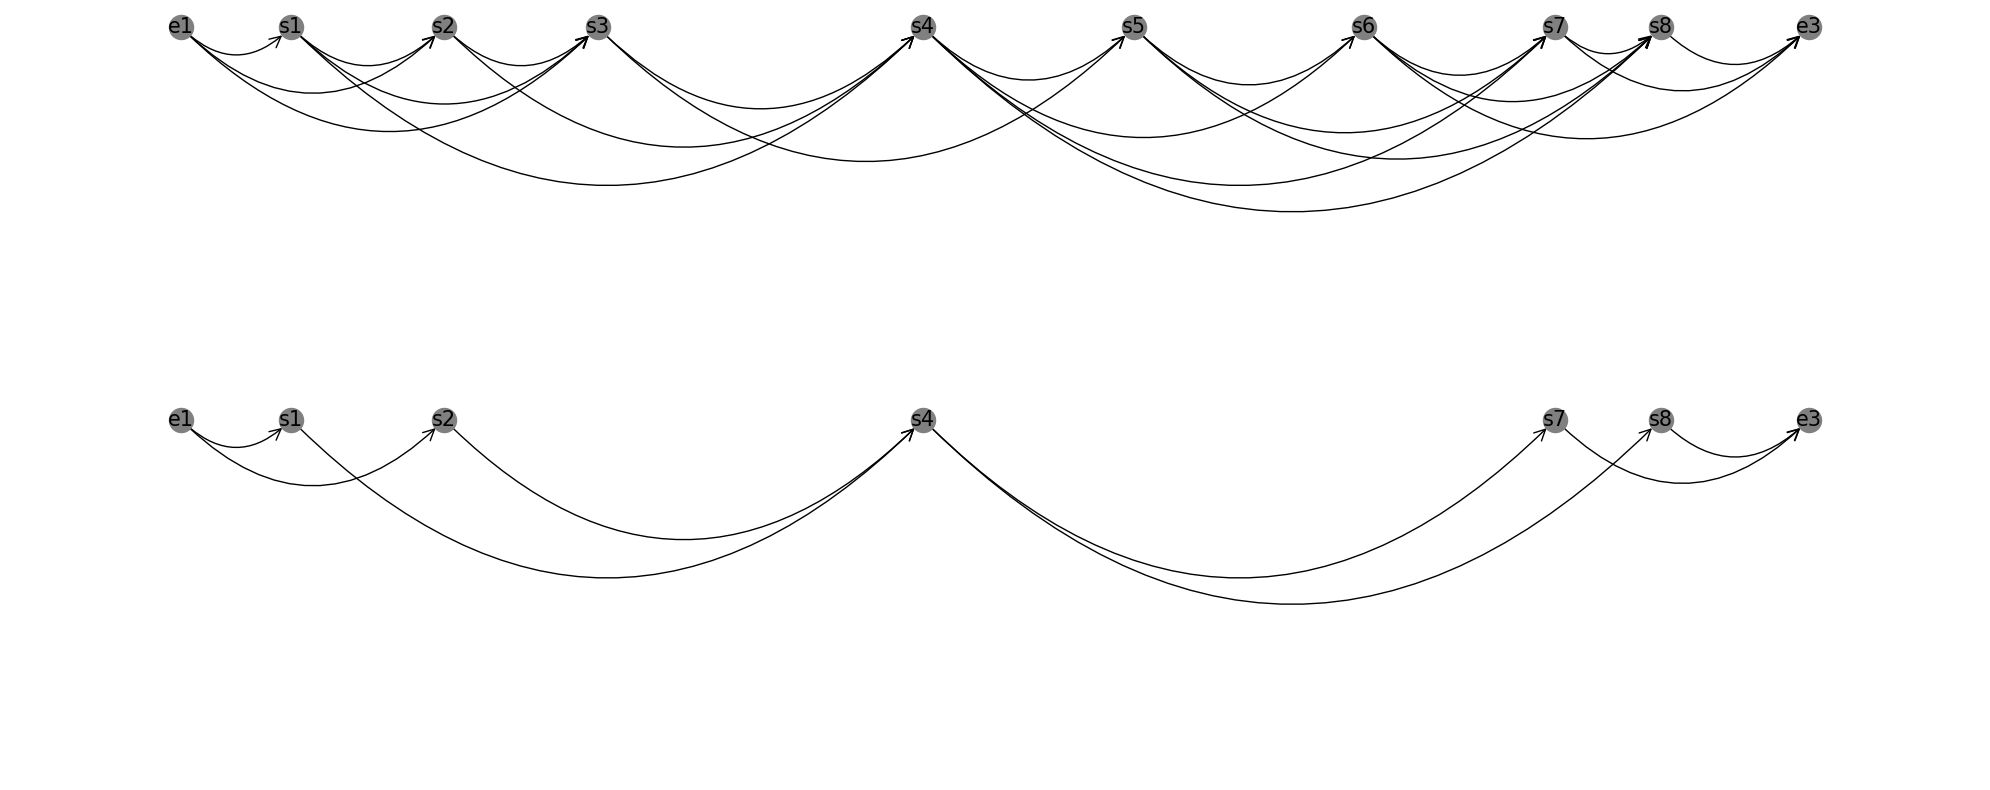

In [157]:
import matplotlib.pyplot as plt
import networkx as nx

# 计算每个节点的位置
def calculate_positions(source, stations, dist):
    positions = {source: 0}
    current_position = 0
    current_station = source

    for station in stations:
        if station in dist.columns and current_station in dist.index:
            current_position += dist[current_station][station]+100
            positions[station] = current_position
            current_station = station

    # 将所有位置转换为 (x, y) 格式，y 设为 0
    positions = {k: (v, 0) for k, v in positions.items()}
    return positions

def draw_network(path_info, Arcs, Strategy, dist):
    G_AS = nx.DiGraph()
    G_strategyS = nx.DiGraph()
    
    source = path_info['source']
    root = path_info['root']
    stations = path_info['stations'] + [root]
    
    # 计算节点位置
    pos = calculate_positions(source, stations, dist)
    
    # 添加AS网络中的弧
    for arc in Arcs:
        G_AS.add_edge(arc[0], arc[1])

    # 添加strategyS网络中的弧
    for arc in Strategy:
        G_strategyS.add_edge(arc[0], arc[1])

    # 创建图形并设置子图布局
    fig, axs = plt.subplots(2, 1, figsize=(20, 8))

    # 绘制第一个子图
    nx.draw(G_AS, pos, ax=axs[0],
            arrowstyle='->', 
            arrowsize=20, 
            width=1,
            with_labels=False, 
            node_size=300, 
            node_color='grey',
            edge_color='black',
            connectionstyle='arc3,rad=0.5')
    nx.draw_networkx_labels(G_AS, pos, ax=axs[0], font_size=15, font_color='black', verticalalignment='center')  # 调整标签的大小和位置


    # 绘制第二个子图
    nx.draw(G_strategyS, pos, ax=axs[1],
            arrowstyle='->', 
            arrowsize=20, 
            width=1,
            with_labels=False, 
            node_size=300, 
            node_color='grey',
            edge_color='black',
            connectionstyle='arc3,rad=0.5')
    nx.draw_networkx_labels(G_strategyS, pos, ax=axs[1], font_size=15, font_color='black', verticalalignment='center')  # 调整标签的大小和位置


    plt.tight_layout()  # 调整子图布局

    plt.show()

draw_network(paths['p2'], paths['p2']['AL'],paths['p2']['strategyL'], dist)